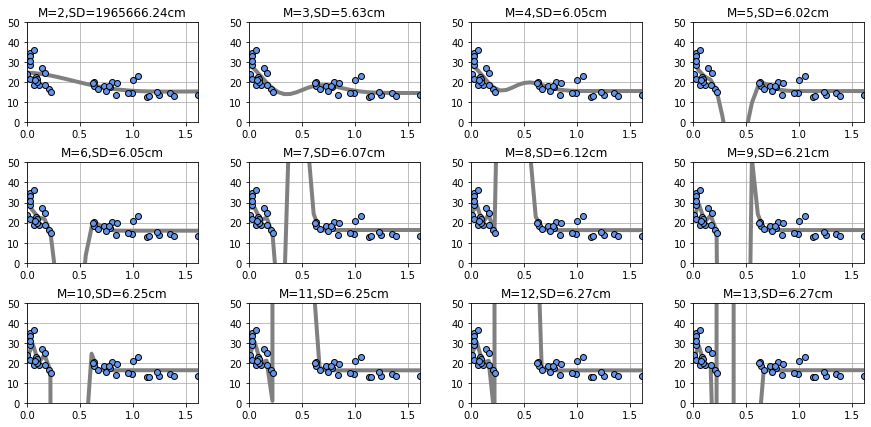

In [115]:
#　Mごとの出力結果
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

def gauss( x, mu, s):
    #return 1+s/(x+mu)
    return npy.exp(-(x-mu)**2 / (2*s**2))

def gauss_func(w,x):
    m = len(w) -1
    mu = npy.linspace(0,0.5,m)
    s = mu[1] -mu[0]
    y = npy.zeros_like(x)
    for j in range(m):
        y = y + w[j]*gauss(x, mu[j], s)
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = npy.mean((y-t)**2)
    return mse

def fit_gauss_func(x,t,m):
    mu = npy.linspace(0,0.5,m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    phi = npy.ones((n,m+1))
    for j in range(m):
        phi[:,j] = gauss(x,mu[j],s)
    
    phi_T = npy.transpose(phi)
    
    b = npy.linalg.inv(phi_T.dot(phi))
    c = b.dot(phi_T)
    w = c.dot(t)
    return w

def show_gauss_func(w):
    xb = npy.linspace(X_min, X_max, 30)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

boston = load_boston()

#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

X = npy.array([X_array[:,0][0:40]])
Y = y_array[0:40]

xline = X[0]
yline = Y

X_min = 0
X_max = max(max(X))
X_n = len(X[0])

plt.figure(figsize=(15,7))
plt.subplots_adjust(wspace=0.3,hspace=0.4)
M = range(2,14)

for i in range(len(M)):
    plt.subplot(3,4,i + 1)
    W = fit_gauss_func(xline,yline,M[i])
    show_gauss_func(W)
    plt.plot(xline,yline,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
    plt.xlim(X_min, X_max)
    plt.ylim(0, 50)
    title = "M={0:d},SD={1:.2f}cm".format(M[i],npy.sqrt(mse))
    plt.title(title)
    plt.grid(True)
    mse = mse_gauss_func(X[0],Y[0],W)

plt.show()

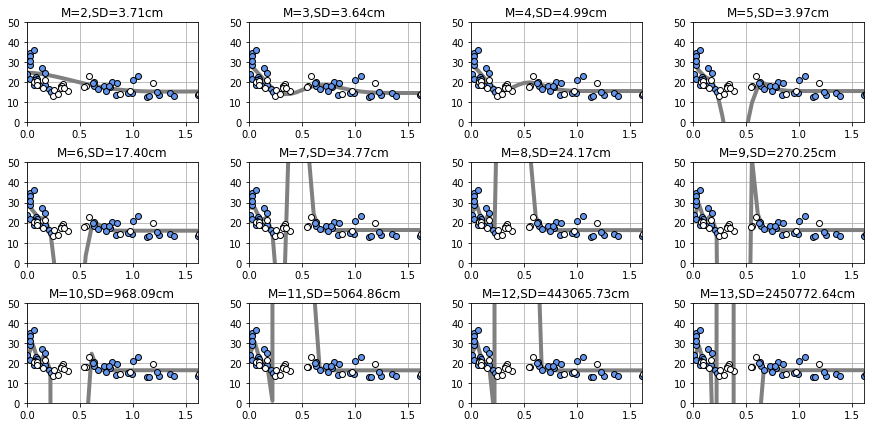

In [113]:
# ホールドアウト検証法
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

def gauss( x, mu, s):
    #return 1+s/(x+mu)
    return npy.exp(-(x-mu)**2 / (2*s**2))

def gauss_func(w,x):
    m = len(w) -1
    mu = npy.linspace(0,0.5,m)
    s = mu[1] -mu[0]
    y = npy.zeros_like(x)
    for j in range(m):
        y = y + w[j]*gauss(x, mu[j], s)
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = npy.mean((y-t)**2)
    return mse

def fit_gauss_func(x,t,m):
    mu = npy.linspace(0,0.5,m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    phi = npy.ones((n,m+1))
    for j in range(m):
        phi[:,j] = gauss(x,mu[j],s)
    
    phi_T = npy.transpose(phi)
    
    b = npy.linalg.inv(phi_T.dot(phi))
    c = b.dot(phi_T)
    w = c.dot(t)
    return w

def show_gauss_func(w):
    xb = npy.linspace(X_min, X_max, 30)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

boston = load_boston()

#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

# 訓練データ
X = npy.array([X_array[:,0][0:40]])
Y = y_array[0:40]
# テストデータ
test_X = npy.array([X_array[:,0][121:150]])
test_Y = y_array[121:150]

xline = X[0]
yline = Y

test_xline = test_X[0]
test_yline = test_Y

X_min = 0
X_max = max(max(X))
X_n = len(X[0])

plt.figure(figsize=(15,7))
plt.subplots_adjust(wspace=0.3,hspace=0.4)
M = range(2,14)

for i in range(len(M)):
    plt.subplot(3,4,i + 1)
    W = fit_gauss_func(xline,yline,M[i])
    show_gauss_func(W)
    plt.plot(xline,yline,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
    plt.plot(test_xline,test_yline,marker='o',linestyle='None',markeredgecolor='black',color='white')
    plt.xlim(X_min, X_max)
    plt.ylim(0, 50)
    title = "M={0:d},SD={1:.2f}cm".format(M[i],npy.sqrt(mse))
    plt.title(title)
    plt.grid(True)
    mse = mse_gauss_func(test_X[0],test_Y[0],W)

plt.show()

<Figure size 1080x504 with 0 Axes>

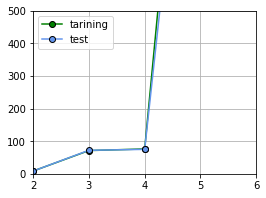

In [111]:
# 交差検証法
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

def gauss( x, mu, s):
    #return 1+s/(x+mu)
    return npy.exp(-(x-mu)**2 / (2*s**2))

def gauss_func(w,x):
    m = len(w) -1
    mu = npy.linspace(0,0.5,m)
    s = mu[1] -mu[0]
    y = npy.zeros_like(x)
    for j in range(m):
        y = y + w[j]*gauss(x, mu[j], s)
    y = y + w[m]
    return y

def kfold_gauss_func(x,t,m,k):
    n = x.shape[0]
    mse_train = npy.zeros(k)
    mse_test = npy.zeros(k)
    for i in range(0, k):
        x_train = x[npy.fmod(range(n), k) != i]
        t_train = t[npy.fmod(range(n), k) != i]
        x_test = x[npy.fmod(range(n), k) == i]
        t_test = t[npy.fmod(range(n), k) == i]
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train,wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = npy.mean((y-t)**2)
    return mse

def fit_gauss_func(x,t,m):
    mu = npy.linspace(0,0.5,m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    phi = npy.ones((n,m+1))
    for j in range(m):
        phi[:,j] = gauss(x,mu[j],s)[0]
    
    phi_T = npy.transpose(phi)
    
    b = npy.linalg.inv(phi_T.dot(phi))
    c = b.dot(phi_T)
    w = c.dot(t)
    return w

boston = load_boston()

#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

# 訓練データ
X = npy.array([X_array[:,0][0:100]])
Y = y_array[0:100]

xline = X[0]
yline = Y

X_min = 0
X_max = max(max(X))
X_n = len(X[0])

plt.figure(figsize=(15,7))
plt.subplots_adjust(wspace=0.3,hspace=0.4)
M = range(2,14)
K = 10
Cv_Gauss_train = npy.zeros((K, len(M)))
Cv_Gauss_test = npy.zeros((K, len(M)))

for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] = kfold_gauss_func(xline, yline,M[i],K)

mean_Gauss_train = npy.sqrt(npy.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = npy.sqrt(npy.mean(Cv_Gauss_test, axis=0))
plt.figure(figsize=(4,3))
plt.plot(M,mean_Gauss_train, marker='o',linestyle='-',markeredgecolor='black',color='green',label='tarining')
plt.plot(M,mean_Gauss_test, marker='o',linestyle='-',markeredgecolor='black',color='cornflowerblue',label='test')
plt.legend(loc='upper left', fontsize=10)

plt.xlim(2,6)
plt.ylim(0,500)
plt.grid(True)

plt.show()

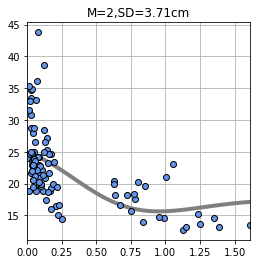

In [112]:
# M=2の予測値
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

def gauss( x, mu, s):
    return npy.exp(-(x-mu)**2 / (2*s**2))

def gauss_func(w,x):
    m = len(w) -1
    mu = npy.linspace(0,0.5,m)
    s = mu[1] -mu[0]
    y = npy.zeros_like(x)
    for j in range(m):
        y = y + w[j]*gauss(x, mu[j], s)
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = npy.mean((y-t)**2)
    return mse

def fit_gauss_func(x,t,m):
    mu = npy.linspace(0,0.5,m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    phi = npy.ones((n,m+1))
    for j in range(m):
        phi[:,j] = gauss(x,mu[j],s)
    
    phi_T = npy.transpose(phi)
    
    b = npy.linalg.inv(phi_T.dot(phi))
    c = b.dot(phi_T)
    w = c.dot(t)
    return w

def show_gauss_func(w):
    xb = npy.linspace(X_min, X_max, 30)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

boston = load_boston()

#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

X = npy.array([X_array[:,0][0:100]])
Y = y_array[0:100]

xline = X[0]
yline = Y

X_min = 0
X_max = max(max(X))
X_n = len(X[0])

M = 2
plt.figure(figsize=(4,4))
W = fit_gauss_func(xline,yline,M)
show_gauss_func(W)
plt.plot(xline,yline,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X[0],Y[0],W)
title = "M={0:d},SD={1:.2f}cm".format(M,npy.sqrt(mse))
plt.title(title)

plt.show()